In [ ]:
import cv2
import os
import numpy as np
#import numpy as np
import matplotlib.pyplot as plt

from skimage import io, color
from skimage.color import rgb2hed,  hed2rgb,  separate_stains, combine_stains, hed_from_rgb, rgb_from_hed

import SimpleITK as sitk

(3000, 4096, 3)


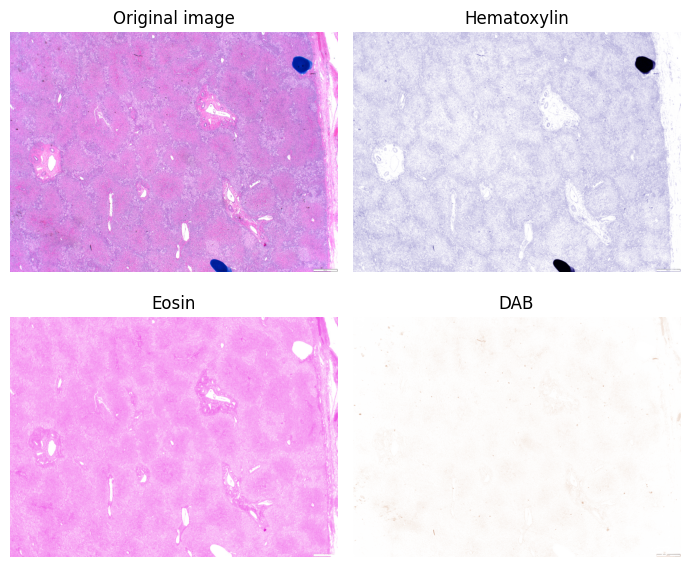

In [ ]:

ihc_rgb = io.imread('APAP 02_24\\1.25X HE stain.jpg') 
# Replace 'path/to/your/image.jpg' with the actual path to your image file

print(ihc_rgb.shape)  # Print the dimensions of the loaded image
# Separate the stains from the IHC image
ihc_hed =color.rgb2hed(ihc_rgb)

# Create an RGB image for each of the stains
null = np.zeros_like(ihc_hed[:, :, 0])
ihc_h = color.hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
ihc_e = color.hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
ihc_d = color.hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

# Display
fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_h)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_e)
ax[2].set_title("Eosin")  # Note that there is no Eosin stain in this image

ax[3].imshow(ihc_d)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

registration

evaluatiokn
* Structural Similarity Index (SSIM) → Measures how similar the registered image is to the reference.

    * Ranges from -1 (completely different) to 1 (perfect match).

    *   Higher SSIM = better alignment.

* Dice Similarity Coefficient (DSC) → Measures how well the masks overlap after registration.

    *   Ranges from 0 (no overlap) to 1 (perfect match).

    *   Higher Dice score = better tissue alignment.

second try

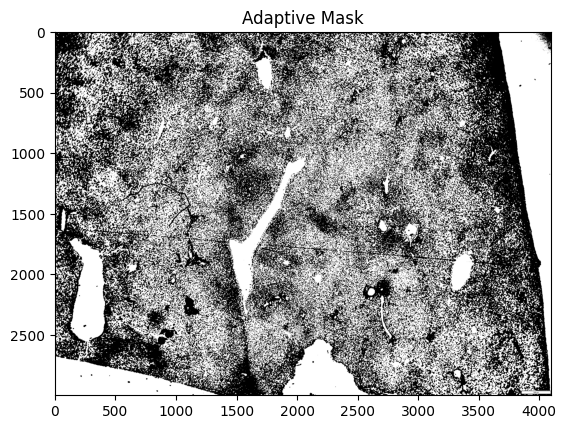

In [ ]:

# ---- Load Images ----
image_paths = ["Normal liver 02_25\\1.25x normal.jpg", "Normal liver 02_25\\1.25x CD3.jpg", "Normal liver 02_25\\1.25x CD20.jpg", "Normal liver 02_25\\1.25x CD68.jpg", "Normal liver 02_25\\1.25x CD163.jpg", "Normal liver 02_25\\1.25x CK7.jpg"]  # List your IHC-stained images
mask_paths = ["test_output\\Normal liver 02_25\\1.25x normal.jpg\\contour_mask.png", "test_output\\Normal liver 02_25\\1.25x CD3.jpg\\contour_mask.png", "test_output\\Normal liver 02_25\\1.25x CD20.jpg\\contour_mask.png", "test_output\\Normal liver 02_25\\1.25x CD68.jpg\\contour_mask.png", "test_output\\Normal liver 02_25\\1.25x CD163.jpg\\contour_mask.png", "test_output\\Normal liver 02_25\\1.25x CK7.jpg\\contour_mask.png"]  # Corresponding masks

from skimage.filters import threshold_otsu

# Load the image
ihc_image = io.imread(image_paths[2])

# Convert image to grayscale
gray_image = cv2.cvtColor(ihc_image, cv2.COLOR_RGB2GRAY)

# Apply CLAHE (Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(gray_image)

# Apply Otsu’s thresholding
_, binary_mask = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display
plt.imshow(binary_mask, cmap="gray")
plt.title("Adaptive Mask")
plt.show()


In [ ]:

def create_adaptive_masks(folder_path='', out_path=''):
    # Loop through folder path all images
    for image in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image)
        # Load the image
        ihc_image = io.imread(image_path)

        # Convert image to grayscale
        gray_image = cv2.cvtColor(ihc_image, cv2.COLOR_RGB2GRAY)

        # Apply CLAHE (Adaptive Histogram Equalization)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        enhanced = clahe.apply(gray_image)

        # Apply Otsu’s thresholding
        _, binary_mask = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Display
        plt.imshow(binary_mask, cmap="gray")
        plt.title("Adaptive Mask")
        plt.show()

        # Save
        saved_img_path = os.path.join(out_path, image)
        cv2.imwrite(saved_img_path, binary_mask)




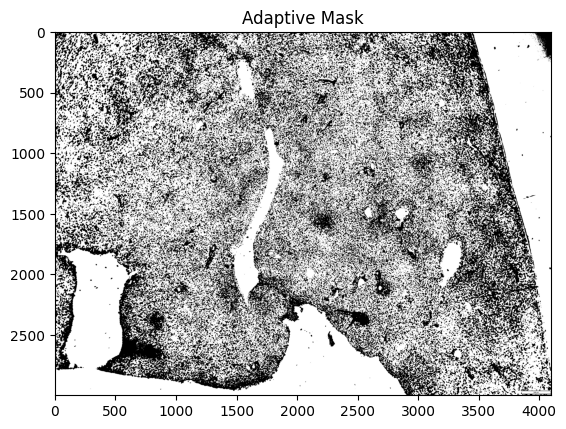

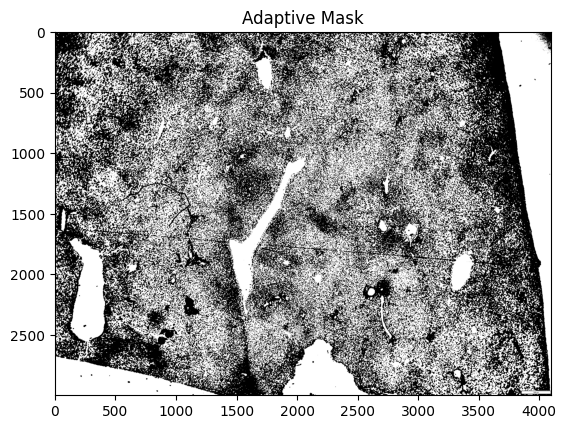

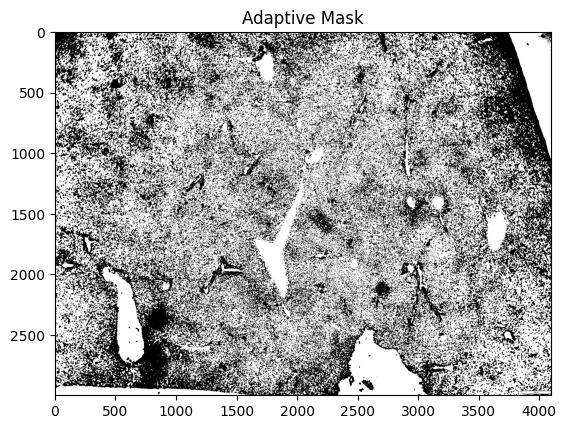

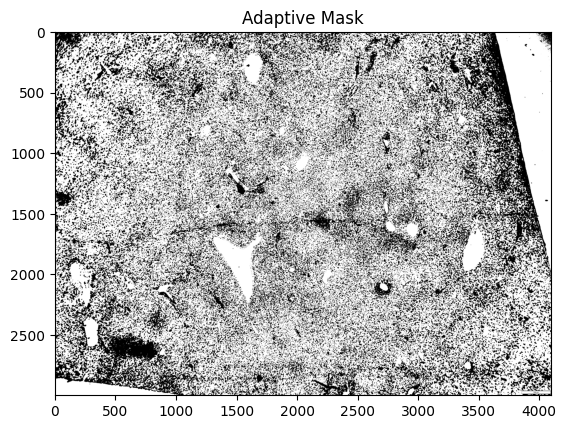

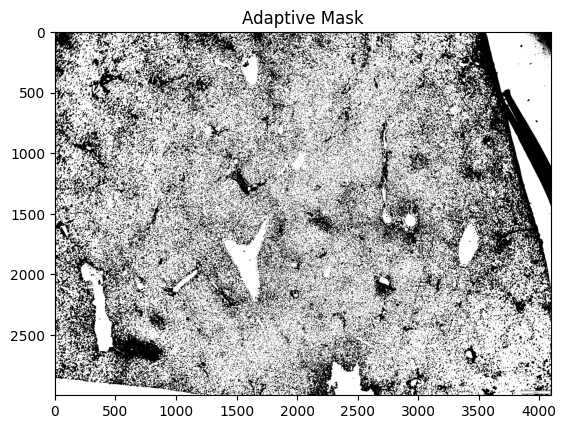

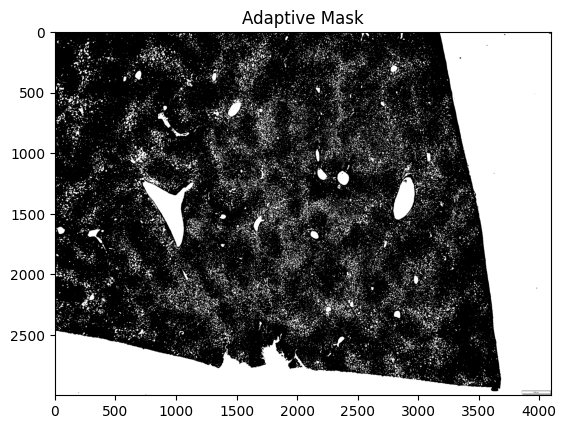

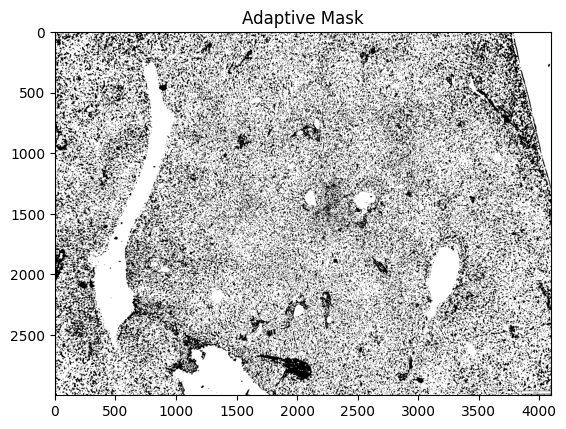

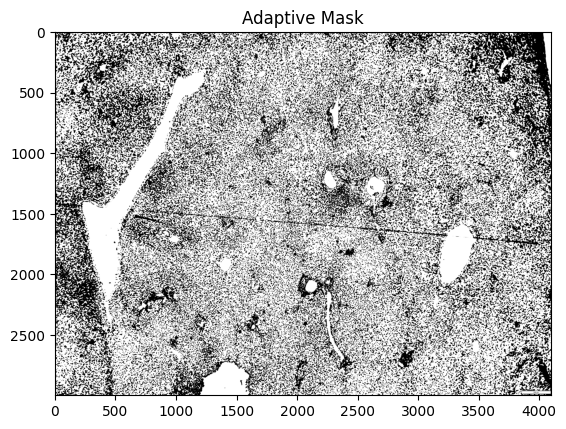

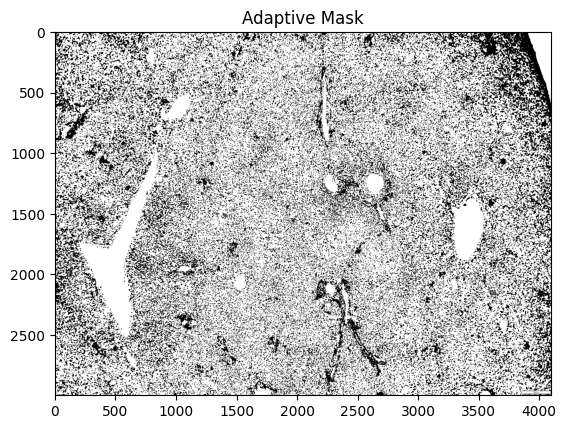

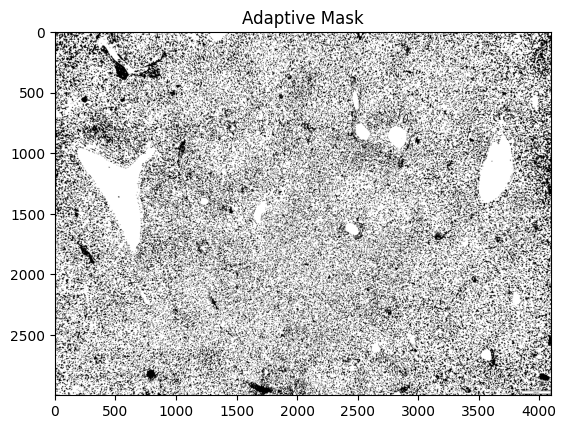

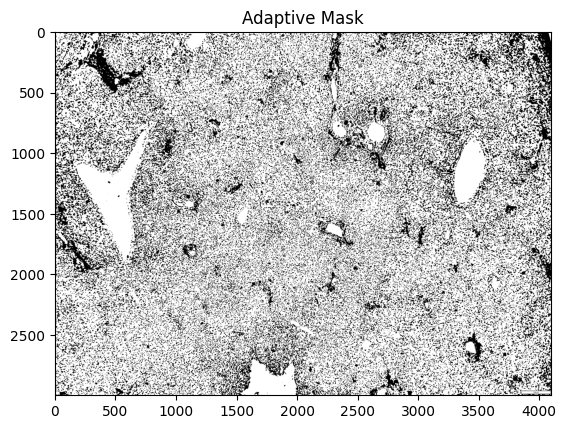

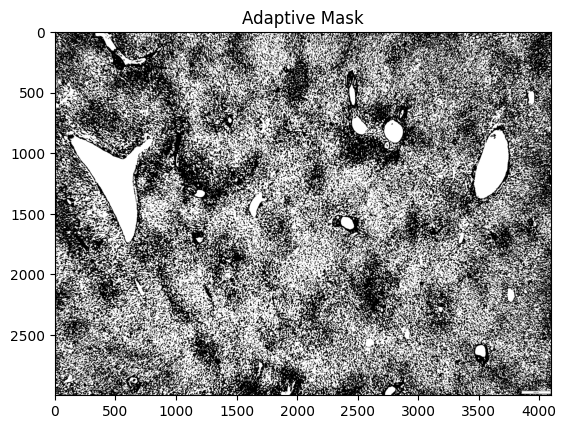

In [9]:
apap_folder_path = 'APAP 02_24'
normal_folder_path = 'Normal liver 02_25'
apap_output_dir = 'adaptive_masks\\APAP 02_24'
normal_output_dir = 'adaptive_masks\\Normal liver'
image_paths = ["Normal liver 02_25\\1.25x CD3.jpg", "Normal liver 02_25\\1.25x CD20.jpg", "Normal liver 02_25\\1.25x CD68.jpg", "Normal liver 02_25\\1.25x CD163.jpg", "Normal liver 02_25\\1.25x CK7.jpg"]  # List your IHC-stained images
mask_paths = ["test_output\\Normal liver 02_25\\1.25x normal.jpg\\contour_mask.png", "test_output\\Normal liver 02_25\\1.25x CD3.jpg\\contour_mask.png", "test_output\\Normal liver 02_25\\1.25x CD20.jpg\\contour_mask.png", "test_output\\Normal liver 02_25\\1.25x CD68.jpg\\contour_mask.png", "test_output\\Normal liver 02_25\\1.25x CD163.jpg\\contour_mask.png", "test_output\\Normal liver 02_25\\1.25x CK7.jpg\\contour_mask.png"]  # Corresponding masks

#create_adaptive_masks(apap_folder_path, apap_output_dir)
create_adaptive_masks(normal_folder_path, normal_output_dir)

view 

2x

In [2]:
def append_paths(outer_folder, inner_paths):
    paths = []
    for i in range(0,len(inner_paths)):
        paths.append(os.path.join(outer_folder, inner_paths[i]))

    return paths

def return_pathways(image_dir, mask_dir, fixed_img_name, fixed_mask_name):
    # List image and mask paths
    image_paths = os.listdir(image_dir)
    image_paths = append_paths(image_dir, image_paths)
    
    mask_paths = os.listdir(mask_dir)
    mask_paths = append_paths(mask_dir, mask_paths)

    # Get index of image to be used as the fixed/refrence image
    fixed_image_idx = image_paths.index(fixed_img_name)
    fixed_mask_idx = mask_paths.index(fixed_mask_name)


    fixed_image_path = image_paths[fixed_image_idx]  
    fixed_mask_path = mask_paths[fixed_mask_idx]

    # Remove refrence from image paths and mask paths so we dont recompute 
    image_paths.pop(fixed_image_idx)
    mask_paths.pop(fixed_mask_idx)

    return image_paths, mask_paths, fixed_image_path, fixed_mask_path

In [3]:

def register_images(image_dir, mask_dir, fixed_image_name, fixed_mask_name, output_dir):

    image_paths, mask_paths, fixed_image_path, fixed_mask_path = return_pathways(image_dir, mask_dir, fixed_image_name, fixed_mask_name)

    #print(image_paths)
    #print( mask_paths)
    #print( fixed_image_path)
    #print(fixed_mask_path)

    # Select baseline image as the fixed reference
    fixed_image = io.imread(fixed_image_path)  # HE stain
    fixed_mask = io.imread(fixed_mask_path, as_gray=True) > 0.5  # Convert to binary

    # Convert to grayscale if needed
    fixed_gray = color.rgb2gray(fixed_image) if fixed_image.ndim == 3 else fixed_image

    # Convert to SimpleITK format
    sitk_fixed = sitk.GetImageFromArray(fixed_gray.astype(np.float32))
    sitk_fixed_mask = sitk.GetImageFromArray(fixed_mask.astype(np.float32))

    # Storage for registered images & similarity scores
    registered_images = []
    ssim_scores = []
    dice_scores = []

    # ---- Process Each Moving Image ----
    for i in range(0, len(image_paths)):
        moving_image = io.imread(image_paths[i])
        moving_mask = io.imread(mask_paths[i], as_gray=True) > 0.5  # Convert to binary

        # Convert to grayscale if needed
        moving_gray = color.rgb2gray(moving_image) if moving_image.ndim == 3 else moving_image

        # Convert to SimpleITK format
        sitk_moving = sitk.GetImageFromArray(moving_gray.astype(np.float32))
        sitk_moving_mask = sitk.GetImageFromArray(moving_mask.astype(np.float32))
        print(f'starting registration process {image_paths[i]}')
        # ---- Step 1: Rigid Registration ----
        registration = sitk.ImageRegistrationMethod()
        registration.SetMetricFixedMask(sitk_fixed_mask)
        registration.SetMetricMovingMask(sitk_moving_mask)
        registration.SetMetricAsMattesMutualInformation()
        registration.SetInterpolator(sitk.sitkLinear)
        registration.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=300)

        registration.SetInitialTransform(sitk.CenteredTransformInitializer(
            sitk_fixed, sitk_moving, sitk.Euler2DTransform(), sitk.CenteredTransformInitializerFilter.GEOMETRY
        ))

        rigid_transform = registration.Execute(sitk_fixed, sitk_moving)
        moving_rigid = sitk.Resample(sitk_moving, sitk_fixed, rigid_transform, sitk.sitkLinear, 0.0, sitk_moving.GetPixelID())

        # ---- Step 2: Non-Rigid (BSpline) Registration ----
        bspline_transform = sitk.BSplineTransformInitializer(moving_rigid, [10, 10])

        registration.SetInitialTransform(bspline_transform, inPlace=True)
        registration.SetMetricAsCorrelation()
        registration.SetOptimizerAsLBFGSB(gradientConvergenceTolerance=1e-5, numberOfIterations=500)

        non_rigid_transform = registration.Execute(sitk_fixed, moving_rigid)
        final_registered_image = sitk.Resample(sitk_moving, sitk_fixed, non_rigid_transform, sitk.sitkLinear, 0.0, sitk_moving.GetPixelID())

        # Convert to NumPy
        registered_np = sitk.GetArrayFromImage(final_registered_image)
        registered_images.append(registered_np)

        # ---- Compute Structural Similarity Index (SSIM) ----
        ssim_value = ssim(fixed_gray, registered_np, data_range=registered_np.max() - registered_np.min())
        ssim_scores.append(ssim_value)

        # ---- Compute Dice Coefficient ----
        registered_mask = sitk.Resample(sitk_moving_mask, sitk_fixed, non_rigid_transform, sitk.sitkNearestNeighbor, 0.0, sitk_moving_mask.GetPixelID())
        registered_mask_np = sitk.GetArrayFromImage(registered_mask)

        intersection = np.sum((fixed_mask * registered_mask_np))
        dice_score = (2.0 * intersection) / (np.sum(fixed_mask) + np.sum(registered_mask_np))
        dice_scores.append(dice_score)

    # ---- Print Scores ----
    for i in range(len(ssim_scores)):
        print(f"Image {i+1}: SSIM = {ssim_scores[i]:.4f}, Dice = {dice_scores[i]:.4f}")

    # ---- Save Registered Images ----
    output_dir = os.path.join(output_dir, mask_dir, 'registered_images')
    os.makedirs(output_dir, exist_ok=True)

    for i, img in enumerate(registered_images):
        plt.imsave( f'{output_dir}/Aligned_Image_{i+1}.png', img, dpi=300)

    return registered_images, ssim_scores, dice_scores


In [ ]:
# ---- Run for Each Magnification ----
normal_img_folder = "Normal liver 02_25"
normal_mask_folder = 'adaptive_masks\\Normal liver 02_25'
normal_fixed_img_name = 'Normal liver 02_25\\1.25x normal.jpg'
normal_fixed_mask_name = 'adaptive_masks\\Normal liver 02_25\\1.25x normal.jpg'

apap_img_folder = 'APAP 02_24'
apap_mask_folder = 'adaptive_masks\\APAP 02_24'
apap_fixed_img_name = 'APAP 02_24\\1.25x HE stain.jpg'
apap_fixed_mask_name = 'adaptive_masks\\APAP 02_24\\1.25x HE stain.jpg'


In [5]:
normal_registered_images, normal_ssim_scores, normal_dice_scores = register_images(normal_img_folder, normal_mask_folder, normal_fixed_img_name, normal_fixed_mask_name, "final_output3")



starting registration process Normal liver 02_25\1.25x CD163.jpg
starting registration process Normal liver 02_25\1.25x CD20.jpg
starting registration process Normal liver 02_25\1.25x CD3.jpg
starting registration process Normal liver 02_25\1.25x CD68.jpg
starting registration process Normal liver 02_25\1.25x CK7.jpg
starting registration process Normal liver 02_25\2x CD163.jpg
starting registration process Normal liver 02_25\2x CD20.jpg
starting registration process Normal liver 02_25\2x CD3.jpg
starting registration process Normal liver 02_25\2x CD68.jpg
starting registration process Normal liver 02_25\2x CK7.jpg
starting registration process Normal liver 02_25\2x normal.jpg
Image 1: SSIM = 0.2355, Dice = 0.4094
Image 2: SSIM = 0.3455, Dice = 0.4692
Image 3: SSIM = 0.3054, Dice = 0.4287
Image 4: SSIM = 0.3489, Dice = 0.5027
Image 5: SSIM = 0.3157, Dice = 0.4297
Image 6: SSIM = 0.2142, Dice = 0.4492
Image 7: SSIM = 0.2291, Dice = 0.4129
Image 8: SSIM = 0.2693, Dice = 0.4370
Image 9: S

In [6]:
apap_registered_images, apap_ssim_scores, apap_dice_scores = register_images(apap_img_folder, apap_mask_folder, apap_fixed_img_name, apap_fixed_mask_name,  "final_output3")

starting registration process APAP 02_24\1.25 x CD31.jpg
starting registration process APAP 02_24\1.25 x CD34.jpg
starting registration process APAP 02_24\1.25 x CD68.jpg
starting registration process APAP 02_24\1.25 x CK7.jpg
starting registration process APAP 02_24\1.25 x D2-40.jpg
starting registration process APAP 02_24\1.25 x SMA.jpg
starting registration process APAP 02_24\1.25x CD163.jpg
starting registration process APAP 02_24\1.25x CD20.jpg
starting registration process APAP 02_24\1.25x CD3.jpg
starting registration process APAP 02_24\1.25x retic.jpg
starting registration process APAP 02_24\2x CD163.jpg
starting registration process APAP 02_24\2x Cd20.jpg
starting registration process APAP 02_24\2x CD3.jpg
starting registration process APAP 02_24\2x CD31.jpg
starting registration process APAP 02_24\2x CD34.jpg
starting registration process APAP 02_24\2x CD68.jpg
starting registration process APAP 02_24\2x CK7.jpg
starting registration process APAP 02_24\2x D2-40.jpg
starting r

Adding color to the process

In [21]:
def register_images_color(image_dir, mask_dir, fixed_image_name, fixed_mask_name, output_dir):

    image_paths, mask_paths, fixed_image_path, fixed_mask_path = return_pathways(image_dir, mask_dir, fixed_image_name, fixed_mask_name)

    #print(image_paths)
    #print( mask_paths)
    #print( fixed_image_path)
    #print(fixed_mask_path)

    # Select baseline image as the fixed reference
    fixed_image = io.imread(fixed_image_path)  # HE stain
    fixed_mask = io.imread(fixed_mask_path, as_gray=True) > 0.5  # Convert to binary
    
        # Convert to grayscale if needed
    fixed_gray = color.rgb2gray(fixed_image) if fixed_image.ndim == 3 else fixed_image
    
    sitk_fixed = sitk.GetImageFromArray(fixed_gray.astype(np.float32))
    sitk_fixed_mask = sitk.GetImageFromArray(fixed_mask.astype(np.float32))
    
    registered_images = []
    ssim_scores = []
    dice_scores = []
    
    for i in range(0, len(image_paths)):
        
        moving_image = io.imread(image_paths[i])
        moving_mask = io.imread(mask_paths[i], as_gray=True) > 0.5
        
        moving_stains = separate_stains(moving_image, hed_from_rgb)
        moving_gray = moving_stains[..., 0]  # Using Hematoxylin for registration
        
        sitk_moving = sitk.GetImageFromArray(moving_gray.astype(np.float32))
        sitk_moving_mask = sitk.GetImageFromArray(moving_mask.astype(np.float32))
        
        registration = sitk.ImageRegistrationMethod()
        registration.SetMetricFixedMask(sitk_fixed_mask)
        registration.SetMetricMovingMask(sitk_moving_mask)
        registration.SetMetricAsMattesMutualInformation()
        registration.SetInterpolator(sitk.sitkLinear)
        registration.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=300)
        
        registration.SetInitialTransform(sitk.CenteredTransformInitializer(
            sitk_fixed, sitk_moving, sitk.Euler2DTransform(), sitk.CenteredTransformInitializerFilter.GEOMETRY
        ))
        
        rigid_transform = registration.Execute(sitk_fixed, sitk_moving)
        moving_rigid = sitk.Resample(sitk_moving, sitk_fixed, rigid_transform, sitk.sitkLinear, 0.0, sitk_moving.GetPixelID())
        
        bspline_transform = sitk.BSplineTransformInitializer(moving_rigid, [10, 10])
        registration.SetInitialTransform(bspline_transform, inPlace=True)
        registration.SetMetricAsCorrelation()
        registration.SetOptimizerAsLBFGSB(gradientConvergenceTolerance=1e-5, numberOfIterations=500)
        
        non_rigid_transform = registration.Execute(sitk_fixed, moving_rigid)
        final_registered_image = sitk.Resample(sitk_moving, sitk_fixed, non_rigid_transform, sitk.sitkLinear, 0.0, sitk_moving.GetPixelID())
        
        registered_np = sitk.GetArrayFromImage(final_registered_image)
        
        # Compute SSIM
        ssim_value = ssim(fixed_gray, registered_np, data_range=registered_np.max() - registered_np.min())
        ssim_scores.append(ssim_value)
        
        # Compute Dice Score
        registered_mask = sitk.Resample(sitk_moving_mask, sitk_fixed, non_rigid_transform, sitk.sitkNearestNeighbor, 0.0, sitk_moving_mask.GetPixelID())
        registered_mask_np = sitk.GetArrayFromImage(registered_mask)
        
        intersection = np.sum((fixed_mask * registered_mask_np))
        dice_score = (2.0 * intersection) / (np.sum(fixed_mask) + np.sum(registered_mask_np))
        dice_scores.append(dice_score)
        
        # Restore stain appearance
        moving_stains[..., 0] = registered_np
        fused_image = combine_stains(moving_stains, rgb_from_hed)
        registered_images.append(fused_image)
    
    output_dir = os.path.join(output_dir,'final_outputs', mask_dir, 'registered_images')
    os.makedirs(output_dir, exist_ok=True)
    
    for i, img in enumerate(registered_images):
        plt.imsave( f'{output_dir}/Aligned_Image_{i+1}.png', img, dpi=300)
    
    return registered_images, ssim_scores, dice_scores


In [22]:
normal_registered_color_images, normal_color_ssim_scores, normal_color_dice_scores = register_images_color(normal_img_folder, normal_mask_folder, normal_fixed_img_name, normal_fixed_mask_name, "final_output4")


In [23]:
apap_registered_images, apap_ssim_scores, apap_dice_scores = register_images_color(apap_img_folder, apap_mask_folder, apap_fixed_img_name, apap_fixed_mask_name,  "final_output3")

In [ ]:
print("Normal SSIM scores", "\n", normal_ssim_scores[-])
print('Normal Dice Scores', "\n", normal_dice_scores)

print("Apap SSIM score", "\n", apap_ssim_scores)
print("APAP Dice Score", "\n", apap_dice_scores)

Normal SSIM scores 
 [np.float64(0.23549583190014292), np.float64(0.34553228456675766), np.float64(0.30535221216876096), np.float64(0.3488743102706066), np.float64(0.3156968753928303), np.float64(0.2142010344749441), np.float64(0.22913348266704092), np.float64(0.2692829190988293), np.float64(0.21146117140906787), np.float64(0.28695193363296717), np.float64(0.22823985249068632)]
Normal Dice Scores 
 [np.float64(0.40937849280270955), np.float64(0.4692190576053083), np.float64(0.4287446007391978), np.float64(0.5026715914073164), np.float64(0.42969366004359144), np.float64(0.44922167714846534), np.float64(0.412860768741665), np.float64(0.4369658898826976), np.float64(0.43771894047772514), np.float64(0.4888516625365481), np.float64(0.3918792978966914)]
Apap SSIM score 
 [np.float64(0.04416084189517075), np.float64(0.04994743055424547), np.float64(0.028926822491177645), np.float64(0.04889706980641324), np.float64(0.05003549801262063), np.float64(0.032547672313332325), np.float64(0.0358406296